In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.svm import SVC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_performance_dataset.csv")

In [4]:
df.head()

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good


In [5]:
df.head(30)

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
5,Male,Doctorate,Sports & Athletics,Completed,3.3,70.3,B,Average
6,Male,Associate Degree,Arts & Creativity,Completed,4.4,65.9,A,Average
7,Female,Associate Degree,Reading and Literature,Completed,1.4,69.4,A,Below Average
8,Female,Master’s Degree,Arts & Creativity,NaN,1.0,78.1,D,Below Average
9,Male,Master’s Degree,Music,NaN,1.1,60.9,E,Below Average


In [6]:
df.value_counts().sum()

np.int64(586)

In [7]:
df.isnull().sum()

Gender                        0
Parental Education Level      0
Your Interest                 0
Test Preparation            414
Hours Studied                 0
Attendance                    0
Class Group                   0
Performance                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          586 non-null    object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:  # Numerical column
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

C:\Users\panka\AppData\Local\Temp\ipykernel_12240\42609052.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
C:\Users\panka\AppData\Local\Temp\ipykernel_12240\42609052.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [10]:
df

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,Completed,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
...,...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,Completed,3.7,82.5,C,Good
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A,Excellent
997,Male,Some College,Music,Completed,4.5,95.7,C,Excellent
998,Female,Doctorate,Music,Completed,2.5,66.2,D,Average


In [11]:
mean_value

np.float64(79.02369999999999)

In [12]:
mode_value

'Average'

In [13]:
# Define features and target
X = df.drop(columns=['Performance'])
y = df['Performance']

In [14]:
# Categorical columns
numerical_cols = ['Hours Studied', 'Attendance']

ordinal_cols = ['Parental Education Level']
# Define order (if known)
education_order = [['High School', 'Associate', 'Bachelor', 'Master', 'PhD']]  # Adjust based on real values

nominal_cols = ['Gender', 'Your Interest', 'Test Preparation', 'Class Group']


In [50]:
education_order = [['Bachelor’s Degree', 'Associate Degree' ,'Master’s Degree' ,'High School',
 'Some College', 'Doctorate']]

In [51]:
# Ordinal encoder pipeline
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=education_order))
])

# Nominal encoder pipeline
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [52]:
ordinal_transformer

Pipeline(steps=[('ordinal',
                 OrdinalEncoder(categories=[['Bachelor’s Degree',
                                             'Associate Degree',
                                             'Master’s Degree', 'High School',
                                             'Some College', 'Doctorate']]))])

In [53]:
numerical_cols = ['Hours Studied', 'Attendance']

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])


In [54]:
# 4. Combine nominal and ordinal into one categorical transformer
categorical_transformer = ColumnTransformer(transformers=[
    ('ord', ordinal_transformer, ordinal_cols),
    ('nom', nominal_transformer, nominal_cols)
])

# 5. Combine numeric and categorical transformers into final preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, ordinal_cols + nominal_cols)
])


In [55]:
# Define full pipeline with SVM
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, probability=True))
])

In [56]:
print(X_train['Parental Education Level'].unique())


['Bachelor’s Degree' 'Associate Degree' 'Master’s Degree' 'High School'
 'Some College' 'Doctorate']


In [57]:
# Split features and target
X = df[['Gender', 'Parental Education Level', 'Your Interest',
 'Test Preparation', 'Hours Studied', 'Attendance', 'Class Group']] # Features
y = df['Performance']                # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% test data, 80% training data
    random_state=42,       # Ensures reproducibility
    stratify=y             # Preserves the target class distribution
)


In [58]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours Studied',
                                                   'Attendance']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('ord',
                                                                                   Pipeline(steps=[('ordinal',
                                                                                                    OrdinalEncoder(categories=[['Bachelor’s '
                                                                                                                                'Degree',
                                                                                                                                'Associate '
                                                                                                                                'Degree',
                                                                                                                                'Master’s '
                                                                                                                                'Degree',
                                                                                                                                'High '
                                                                                                                                'School',
                                                                                                                                'Some '
                                                                                                                                'College',
                                                                                                                                'Doctorate']]))]),
                                                                                   ['Parental '
                                                                                    'Education '
                                                                                    'Level']),
                                                                                  ('nom',
                                                                                   Pipeline(steps=[('onehot',
                                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                                   ['Gender',
                                                                                    'Your '
                                                                                    'Interest',
                                                                                    'Test '
                                                                                    'Preparation',
                                                                                    'Class '
                                                                                    'Group'])]),
                                                  ['Parental Education Level',
                                                   'Gender', 'Your Interest',
                                                   'Test Preparation',
                                                   'Class Group'])])),
                ('classifier', SVC(kernel='linear', probability=True))])

In [59]:
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

      Average       0.87      0.95      0.91        64
Below Average       0.85      0.81      0.83        27
    Excellent       1.00      0.92      0.96        52
         Good       0.88      0.92      0.90        53
         Poor       0.00      0.00      0.00         4

     accuracy                           0.90       200
    macro avg       0.72      0.72      0.72       200
 weighted avg       0.88      0.90      0.89       200



c:\Users\panka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\panka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\panka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [61]:
from sklearn.metrics import accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

90.0

<Figure size 1200x1000 with 0 Axes>

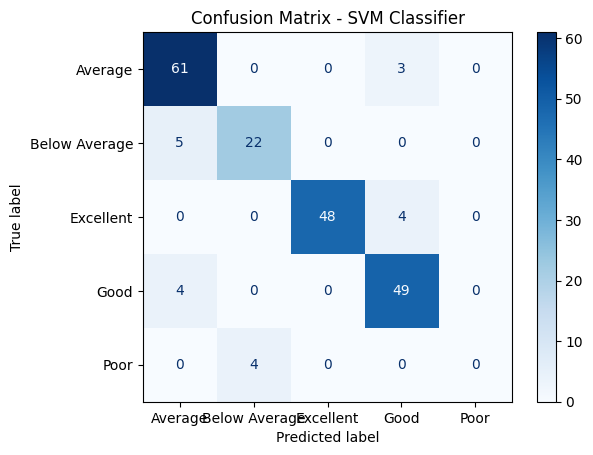

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)

plt.figure(figsize=(12, 10))
disp.plot(cmap='Blues', values_format='d', )
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

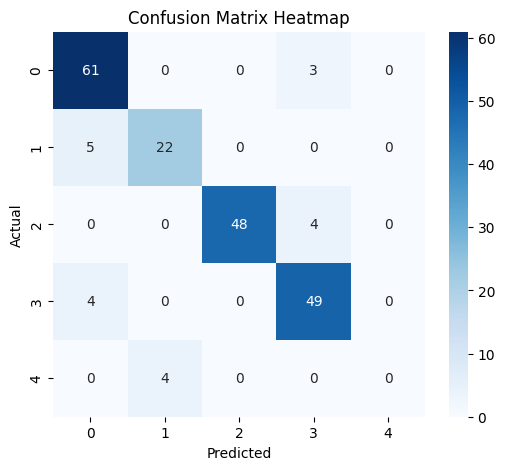

In [68]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


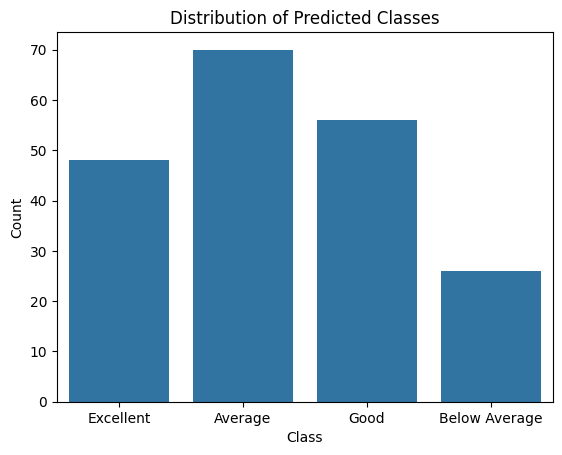

In [69]:
import seaborn as sns

sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [70]:
import joblib

# Save the pipeline (preprocessor + SVM model)
joblib.dump(model_pipeline, 'student_performance_model.pkl')


['student_performance_model.pkl']